In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report

%matplotlib inline

df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df = df.drop(['id','date', 'lat', 'long','zipcode'], axis =1)


# Analysis and Data Exploration

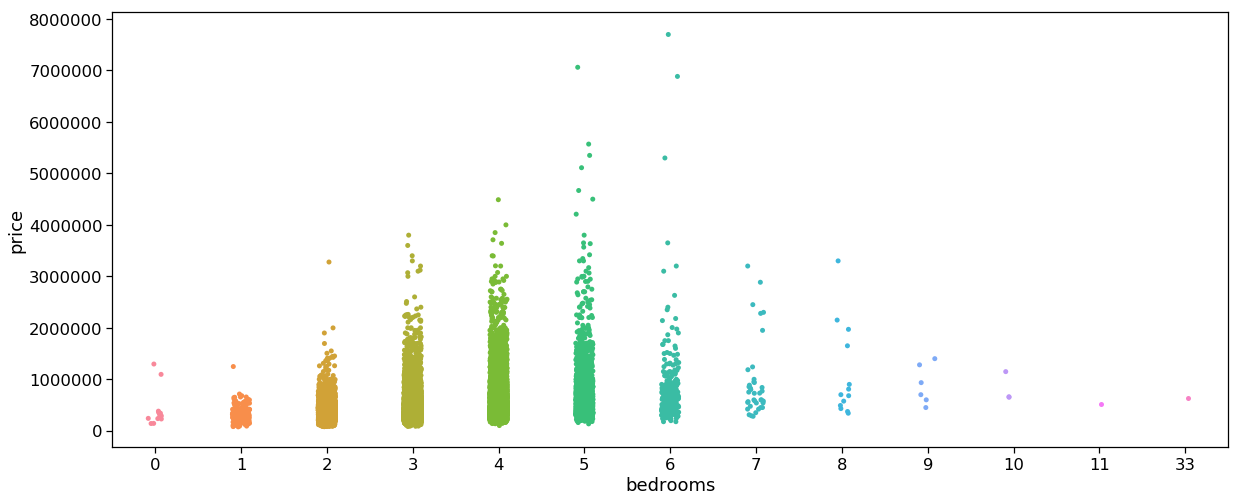

In [6]:
plt.figure(figsize=(20, 8))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sb.stripplot(x="bedrooms", y="price", data=df);

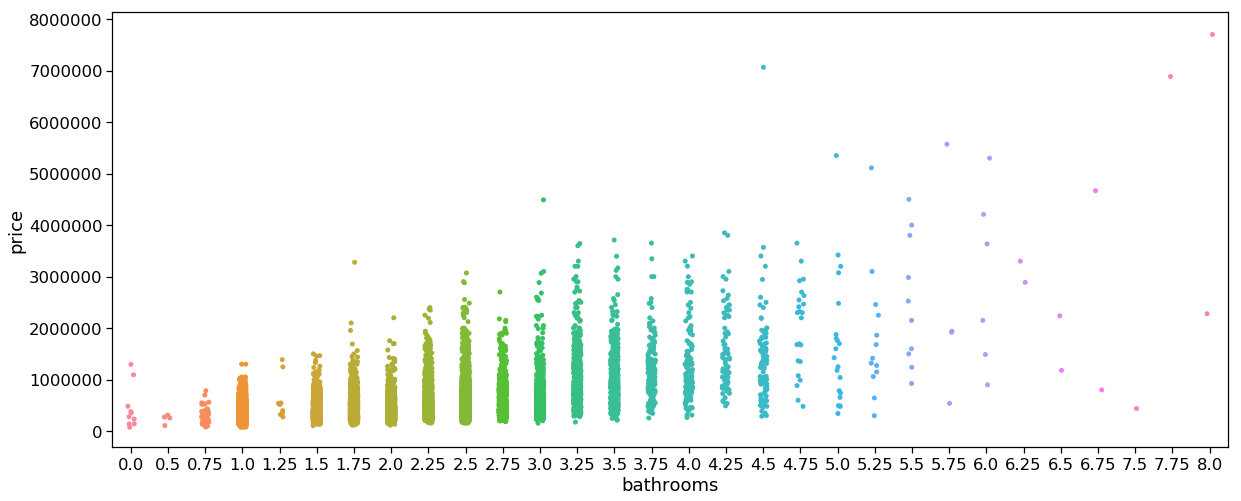

In [7]:
plt.figure(figsize=(20, 8))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sb.stripplot(x="bathrooms", y="price", data=df);

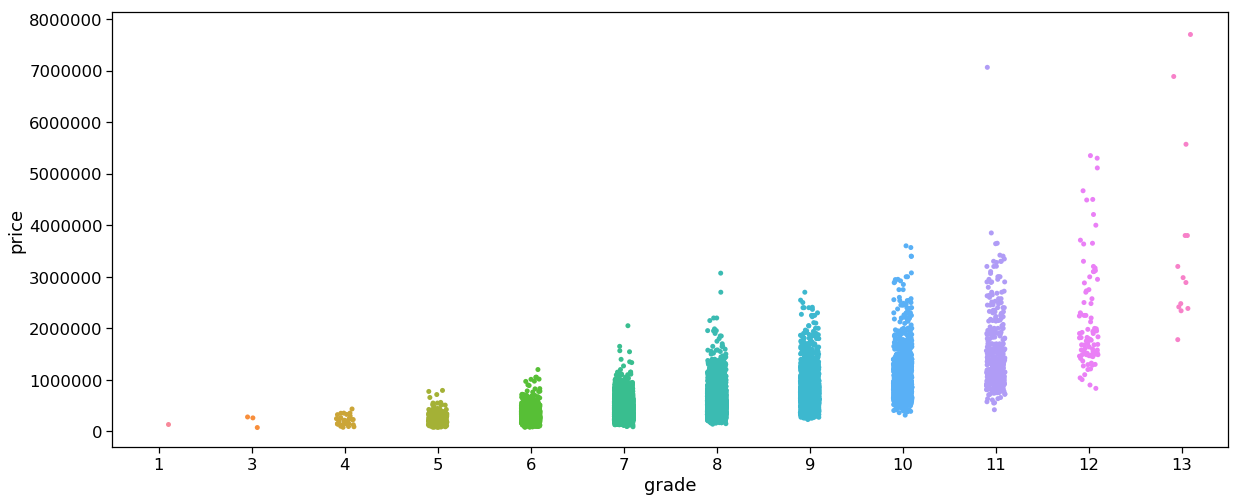

In [8]:
plt.figure(figsize=(20, 8))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sb.stripplot(x="grade", y="price", data=df);

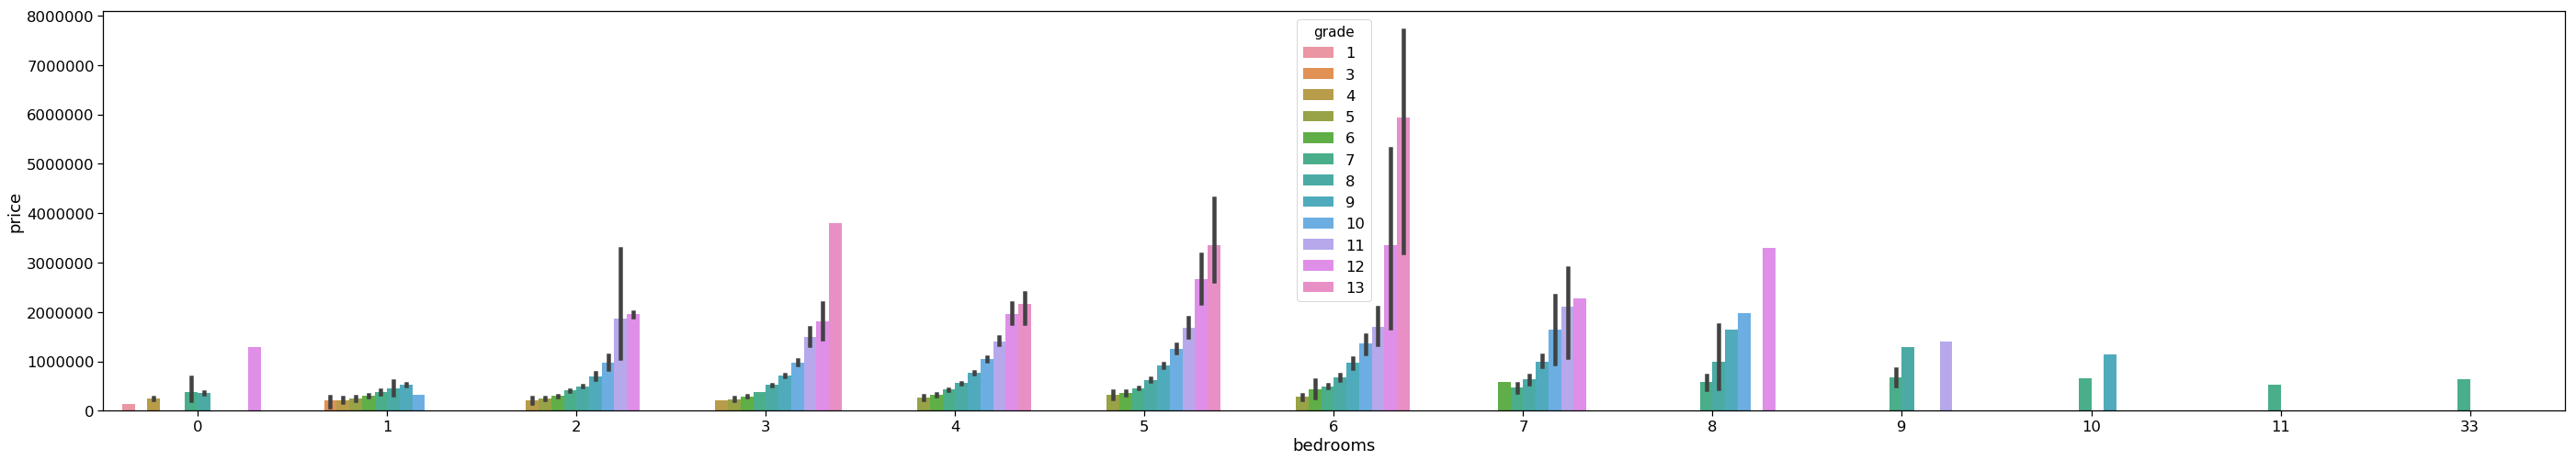

In [9]:
plt.figure(figsize=(48, 8))
sb.barplot(x="bedrooms", y="price", hue="grade", data=df);

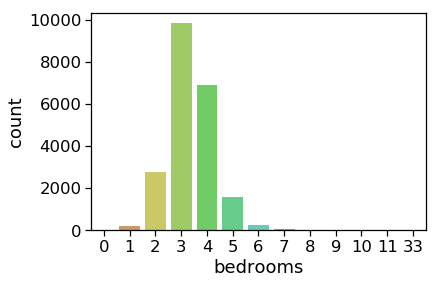

In [10]:
sb.countplot(x='bedrooms',data=df, palette='hls')


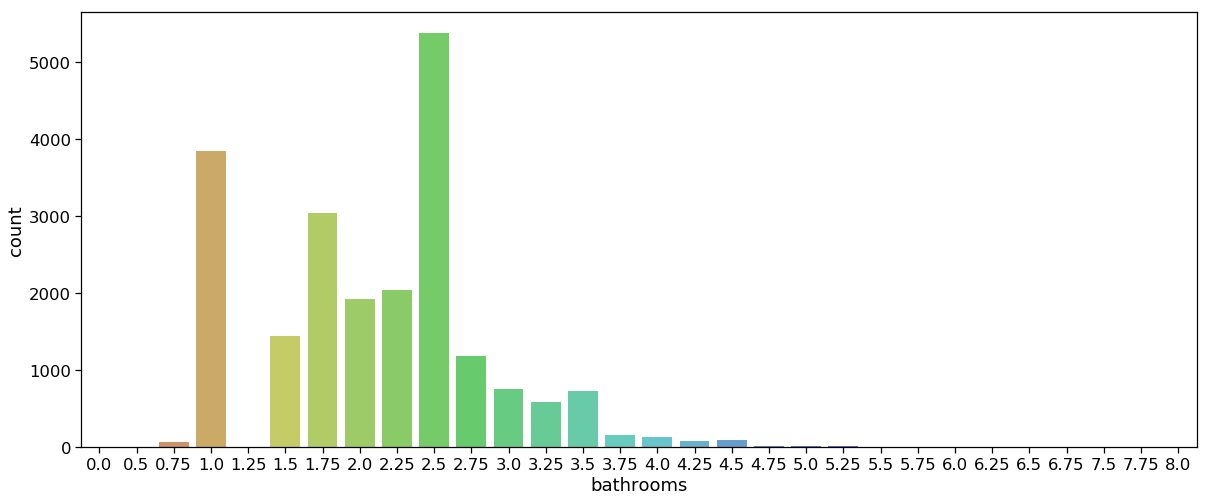

In [11]:
plt.figure(figsize=(20, 8))


sb.countplot(x='bathrooms',data=df, palette='hls')



In [12]:
df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
5        4.50
6        2.25
7        1.50
8        1.00
9        2.50
10       2.50
11       1.00
12       1.00
13       1.75
14       2.00
15       3.00
16       2.00
17       1.00
18       1.00
19       1.00
20       1.75
21       2.75
22       2.50
23       1.50
24       2.25
25       2.00
26       1.75
27       1.00
28       1.75
29       2.50
         ... 
21583    1.00
21584    2.50
21585    2.50
21586    2.50
21587    2.50
21588    1.50
21589    2.50
21590    3.50
21591    2.75
21592    2.25
21593    3.75
21594    2.75
21595    2.25
21596    2.75
21597    3.25
21598    2.50
21599    3.00
21600    3.75
21601    2.50
21602    1.75
21603    2.50
21604    2.00
21605    2.50
21606    3.50
21607    2.50
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [13]:
df['bathrooms'] = df['bathrooms'].astype(int)

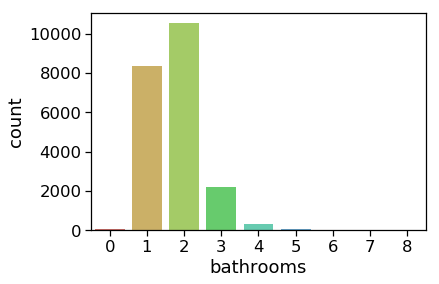

In [14]:
sb.countplot(x='bathrooms',data=df, palette='hls')



### Get the data ready for the learning algorithm

In [15]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']
labels = df['price'].values
features = df[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

# let's try to use linear regression algorithm

In [16]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print ("Accuracy in the training data: ", Accuracy)

accuracy = regr.score(X_test, y_test)
print ("Accuracy in the test data", accuracy)

Accuracy in the training data:  0.659960926258
Accuracy in the test data 0.644778326404


**The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0**

In [17]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [18]:
regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print ("Accuracy in the training data: ", Accuracy)

accuracy = regr.score(X_test, y_test)
print ("Accuracy in the test data", accuracy)

Accuracy in the training data:  0.659960926258
Accuracy in the test data 0.644778326404


In [19]:
from keras  import models
from keras  import layers

def  build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.
/Users/faris/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [ ]:
train_data = X_train
train_targets = y_train

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)



processing fold # 0


In [ ]:
plt.plot(range(1, len(all_scores) + 1), all_scores)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()